In [1]:
from numba import jit,njit,prange
import numpy as np
import time
import matplotlib.pyplot as plt
import math
from numba import vectorize, cuda, float32
import imageio

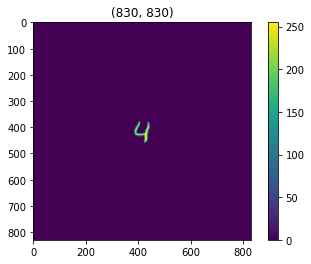

In [2]:
number4=imageio.imread('4.png')
plt.title(number4.shape)
plt.imshow(number4)
plt.colorbar()
plt.show()

Elapsed (after compilation) = 0.7592921257019043


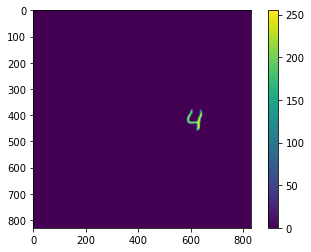

In [3]:
#move location one
holder=np.zeros((830,830))

@cuda.jit
def one_on_one(A,B):
    x,y=cuda.grid(2)
    if (x+200)<A.shape[0]:
        B[x,y+200]=A[x,y]

start = time.time()

griddim= 83,83
blockdim=10,10
one_on_one[griddim,blockdim](number4,holder)

end = time.time()
print("Elapsed (after compilation) = %s" % (end - start))

plt.imshow(holder)
plt.colorbar()
plt.show()

Elapsed (after compilation) = 0.3597676753997803


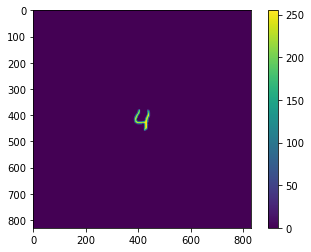

In [6]:
#simplest one
holder=np.zeros((830,830))

@cuda.jit
def one_on_one(A,B):
    x,y=cuda.grid(2)
    B[x,y]=A[x,y]

start = time.time()

griddim= 83,83
blockdim=10,10
one_on_one[griddim,blockdim](number4,holder)

end = time.time()
print("Elapsed (after compilation) = %s" % (end - start))

plt.imshow(holder)
plt.colorbar()
plt.show()

In [5]:
#1D id testing
AA=np.random.rand(10)
BB=np.zeros(10)

@cuda.jit
def one_on_one(A,B):

    
    tx = cuda.threadIdx.x
    bx = cuda.blockIdx.x
    dx = cuda.gridDim.x

    
    pos1=tx+bx*dx

    
    if pos1 < A.size:  # Check array boundaries
        B[pos1]=A[pos1]
    


start = time.time()

griddim= 2
blockdim=5
one_on_one[griddim,blockdim](AA,BB)

end = time.time()
print("Elapsed (after compilation) = %s" % (end - start))

BB

Elapsed (after compilation) = 0.15856385231018066


array([0.55531304, 0.77759278, 0.526074  , 0.76277111, 0.3543005 ,
       0.54519151, 0.3906119 , 0.        , 0.        , 0.        ])

In [4]:
import numpy as np
from numba import cuda

@cuda.jit
def add_2D_coordinates_stride(A):

    grid_y, grid_x = cuda.grid(2)
    # By passing `2`, we get the grid size in both the x an y dimensions
    stride_y, stride_x = cuda.gridsize(2)
    
    for data_i in range(grid_x, A.shape[0], stride_x):
        for data_j in range(grid_y, A.shape[1], stride_y):
            A[data_i][data_j] = grid_x + grid_y 
            
A = np.zeros(55).reshape(11, 5).astype(np.int32)
d_A = cuda.to_device(A)

blocks = (3, 2)
threads_per_block = (3, 2)

# With this configuration, `stride_x` will be 9, and `stride_y` will be 4
add_2D_coordinates_stride[blocks, threads_per_block](d_A)
print(d_A.copy_to_host())

[[0 1 2 3 4]
 [1 2 3 4 5]
 [2 3 4 5 6]
 [3 4 5 6 7]
 [0 1 2 3 4]
 [1 2 3 4 5]
 [2 3 4 5 6]
 [3 4 5 6 7]
 [0 1 2 3 4]
 [1 2 3 4 5]
 [2 3 4 5 6]]


In [5]:
@cuda.jit
def add_2D_coordinates_stride(A):

    grid_x, grid_y = cuda.grid(2)
    # By passing `2`, we get the grid size in both the x an y dimensions
    
    
    A[grid_x][grid_y] = grid_x + grid_y
            
A = np.zeros(55).reshape(11, 5).astype(np.int32)
d_A = cuda.to_device(A)

blocks = (3, 2)
threads_per_block = (3, 2)

# With this configuration, `stride_x` will be 9, and `stride_y` will be 4
add_2D_coordinates_stride[blocks, threads_per_block](d_A)
print(d_A.copy_to_host())

[[ 0  1  2  3  0]
 [ 1  2  3  4  0]
 [ 2  3  4  5  0]
 [ 3  4  5  6  0]
 [ 4  5  6  7  0]
 [ 5  6  7  8  0]
 [ 6  7  8  9  0]
 [ 7  8  9 10  0]
 [ 8  9 10 11  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]


In [7]:
#2D with id
holder=np.zeros((830,830))

@cuda.jit
def one_on_one(A,B):
 
    
    tx = cuda.threadIdx.x
    ty = cuda.threadIdx.y
    
    bx = cuda.blockIdx.x
    by = cuda.blockIdx.y
    
    dx = cuda.gridDim.x

    
    pos1=tx+bx*dx
    pos2=ty+by*dx
    
    if pos1 < A.size:  # Check array boundaries
        B[pos1,pos2]=A[pos1,pos2]
    


start = time.time()

griddim= 83,83
blockdim=10,10
one_on_one[griddim,blockdim](number4,holder)

end = time.time()
print("Elapsed (after compilation) = %s" % (end - start))

plt.imshow(holder)
plt.colorbar()
plt.show()

CudaAPIError: [700] Call to cuLinkCreate results in UNKNOWN_CUDA_ERROR

Elapsed (after compilation) = 4.441404819488525


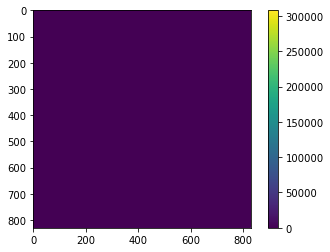

In [8]:
#add all cross test
holder=np.zeros((830,830))

@cuda.jit
def one_on_one(A,B):
    x,y=cuda.grid(2)
    tmp=0
    for x in range(830):
        for y in range(830):
            tmp+=A[x,y]
    B[x,y]=tmp

start = time.time()
griddim= 83,83
blockdim=10,10
one_on_one[griddim,blockdim](number4,holder)
end = time.time()
print("Elapsed (after compilation) = %s" % (end - start))

plt.imshow(holder)
plt.colorbar()
plt.show()

In [4]:
#add all cross test with shared memory
holder=np.zeros((830,830))

@cuda.jit
def one_on_one(A,B):
    sA = cuda.shared.array(shape=(830, 830), dtype=float32)
    x,y=cuda.grid(2)
#    tmp=0
    tx = cuda.threadIdx.x
    ty = cuda.threadIdx.y
    bpg = cuda.gridDim.x
    sA[tx,ty]=A[x,y]
    B[x,y]=sA[tx,ty]
#    for x in range(830):
#        for y in range(830):
#            tmp+=sA[x,y]
#    B[x,y]=tmp

start = time.time()
griddim= 83,83
blockdim=10,10
one_on_one[griddim,blockdim](number4,holder)
end = time.time()
print("Elapsed (after compilation) = %s" % (end - start))

plt.imshow(holder)
plt.colorbar()
plt.show()

LinkerError: [999] Call to cuLinkComplete results in CUDA_ERROR_UNKNOWN
error   : Entry function '_ZN6cudapy8__main__14one_on_one$242E5ArrayIhLi2E1C7mutable7alignedE5ArrayIdLi2E1C7mutable7alignedE' uses too much shared data (0x2a0c10 bytes, 0xc000 max)

In [6]:
import numpy as np
from numba import types, cuda

@cuda.jit
def swap_with_shared(x, y):
    # Allocate a 4 element vector containing int32 values in shared memory.
    temp = cuda.shared.array(4, dtype=types.int32)
    
    idx = cuda.grid(1)
    
    # Move an element from global memory into shared memory
    temp[idx] = x[idx]
    
    # cuda.syncthreads will force all threads in the block to synchronize here, which is necessary because...
    cuda.syncthreads()
    #...the following operation is reading an element written to shared memory by another thread.
    
    # Move an element from shared memory back into global memory
    y[idx] = temp[cuda.blockDim.x - cuda.threadIdx.x - 1] # swap elements
    
x = np.arange(4).astype(np.int32)
y = np.zeros_like(x)

# Move host memory to device (global) memory
d_x = cuda.to_device(x)
d_y = cuda.to_device(y)

swap_with_shared[1, 4](d_x, d_y)

# Move device (global) memory back to the host
d_y.copy_to_host()

array([3, 2, 1, 0])

In [43]:
TILE_DIM = 3
BLOCK_ROWS = 3

@cuda.jit
def transpose(a_in, a_out):
    y = cuda.blockIdx.x * TILE_DIM + cuda.threadIdx.x
    x = cuda.blockIdx.y * TILE_DIM + cuda.threadIdx.y
    #y = cuda.blockIdx.x * cuda.blockDim.x + cuda.threadIdx.x
    #x = cuda.blockIdx.y * cuda.blockDim.y + cuda.threadIdx.y

    for j in range(0, TILE_DIM, BLOCK_ROWS):
        a_out[x + j, y] = a_in[y, x + j]
    #a_out[x, y] = a_in[y, x]  

size = 9
a_in = cuda.to_device(np.arange(size*size, dtype=np.int32).reshape((size, size)))
a_out = cuda.device_array_like(a_in)

print(a_in.copy_to_host())

grid_shape = (int(size/TILE_DIM), int(size/TILE_DIM))
transpose[grid_shape,(TILE_DIM, BLOCK_ROWS)](a_in, a_out); cuda.synchronize()
print(a_out.copy_to_host())

[[ 0  1  2  3  4  5  6  7  8]
 [ 9 10 11 12 13 14 15 16 17]
 [18 19 20 21 22 23 24 25 26]
 [27 28 29 30 31 32 33 34 35]
 [36 37 38 39 40 41 42 43 44]
 [45 46 47 48 49 50 51 52 53]
 [54 55 56 57 58 59 60 61 62]
 [63 64 65 66 67 68 69 70 71]
 [72 73 74 75 76 77 78 79 80]]
[[ 0  9 18 27 36 45 54 63 72]
 [ 1 10 19 28 37 46 55 64 73]
 [ 2 11 20 29 38 47 56 65 74]
 [ 3 12 21 30 39 48 57 66 75]
 [ 4 13 22 31 40 49 58 67 76]
 [ 5 14 23 32 41 50 59 68 77]
 [ 6 15 24 33 42 51 60 69 78]
 [ 7 16 25 34 43 52 61 70 79]
 [ 8 17 26 35 44 53 62 71 80]]


In [41]:
import numba.types

@cuda.jit
def tile_transpose(a_in, a_out):
    # THIS CODE ASSUMES IT IS RUNNING WITH A BLOCK DIMENSION OF (TILE_SIZE x TILE_SIZE)
    # AND INPUT IS A MULTIPLE OF TILE_SIZE DIMENSIONS
    tile = cuda.shared.array((TILE_DIM, TILE_DIM), numba.types.int32)

    x = cuda.blockIdx.x * TILE_DIM + cuda.threadIdx.x
    y = cuda.blockIdx.y * TILE_DIM + cuda.threadIdx.y
    
    for j in range(0, TILE_DIM, BLOCK_ROWS):
        tile[cuda.threadIdx.y + j, cuda.threadIdx.x] = a_in[y + j, x] # move tile into shared memory

    cuda.syncthreads()  # wait for all threads in the block to finish updating shared memory

    # Compute transposed offsets
    x = cuda.blockIdx.y * TILE_DIM + cuda.threadIdx.x
    y = cuda.blockIdx.x * TILE_DIM + cuda.threadIdx.y

    for j in range(0, TILE_DIM, BLOCK_ROWS):
        a_out[y + j, x] = tile[cuda.threadIdx.x, cuda.threadIdx.y + j];
        
a_out = cuda.device_array_like(a_in)

tile_transpose[grid_shape,(TILE_DIM, BLOCK_ROWS)](a_in, a_out); cuda.synchronize()
print(a_out.copy_to_host())

[[ 0  9 18 27 36 45 54 63 72]
 [ 1 10 19 28 37 46 55 64 73]
 [ 2 11 20 29 38 47 56 65 74]
 [ 3 12 21 30 39 48 57 66 75]
 [ 4 13 22 31 40 49 58 67 76]
 [ 5 14 23 32 41 50 59 68 77]
 [ 6 15 24 33 42 51 60 69 78]
 [ 7 16 25 34 43 52 61 70 79]
 [ 8 17 26 35 44 53 62 71 80]]


In [33]:
from numba import cuda, types
import numpy as np

TILE_DIM = 2
BLOCK_ROWS = 4
TILE_DIM_PADDED = TILE_DIM + 1  # Read Mark Harris' blog post to find out why this improves performance!
                                # https://devblogs.nvidia.com/parallelforall/efficient-matrix-transpose-cuda-cc/

@cuda.jit
def tile_transpose_no_bank_conflict(a_in, a_out):
    # THIS CODE ASSUMES IT IS RUNNING WITH A BLOCK DIMENSION OF (TILE_SIZE x TILE_SIZE)
    # AND INPUT IS A MULTIPLE OF TILE_SIZE DIMENSIONSx
    tile = cuda.shared.array((TILE_DIM, TILE_DIM_PADDED), types.int32)

    x = cuda.blockIdx.x * TILE_DIM + cuda.threadIdx.x
    y = cuda.blockIdx.y * TILE_DIM + cuda.threadIdx.y
    
    for j in range(0, TILE_DIM, BLOCK_ROWS):
        tile[cuda.threadIdx.y + j, cuda.threadIdx.x] = a_in[y + j, x] # move tile into shared memory

    cuda.syncthreads()  # wait for all threads in the block to finish updating shared memory

    # Compute transposed offsets
    x = cuda.blockIdx.y * TILE_DIM + cuda.threadIdx.x
    y = cuda.blockIdx.x * TILE_DIM + cuda.threadIdx.y

    for j in range(0, TILE_DIM, BLOCK_ROWS):
        a_out[y + j, x] = tile[cuda.threadIdx.x, cuda.threadIdx.y + j];
        

size = 8
a_in = cuda.to_device(np.arange(size*size, dtype=np.int32).reshape((size, size)))
a_out = cuda.device_array_like(a_in)

print(a_in.copy_to_host())

grid_shape = (int(size/TILE_DIM), int(size/TILE_DIM))

tile_transpose_no_bank_conflict[grid_shape,(TILE_DIM, BLOCK_ROWS)](a_in, a_out); cuda.synchronize()
print(a_out.copy_to_host())

[[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]
 [24 25 26 27 28 29 30 31]
 [32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47]
 [48 49 50 51 52 53 54 55]
 [56 57 58 59 60 61 62 63]]
[[   0    8   16   24   32   40   48   56]
 [   1    9   17   25   33   41   49   57]
 [   2   10   18   26   34   42   50   58]
 [   3   11   19   27   35   43   51   59]
 [   0    0    0    0   36   44    0    0]
 [  10   18   26   34   37   45   58 1090]
 [   6   14   22   30    0    0    0    0]
 [   7   15   23   31   44   52   60 1092]]


In [46]:
# Leave the values in this cell alone
M = 128
N = 32

# Input vectors of MxN and NxM dimensions
a = np.arange(M*N).reshape(M,N).astype(np.int32)
b = np.arange(M*N).reshape(N,M).astype(np.int32)
c = np.zeros((M, M)).astype(np.int32)

d_a = cuda.to_device(a)
d_b = cuda.to_device(b)
d_c = cuda.to_device(c)

# NxN threads per block, in 2 dimensions
block_size = (N,N)
# MxM/NxN blocks per grid, in 2 dimensions
grid_size = (int(M/N),int(M/N))

@cuda.jit
def mm_shared(a, b, c):
    column, row = cuda.grid(2)
    sum = 0

    # `a_cache` and `b_cache` are already correctly defined
    a_cache = cuda.shared.array(block_size, types.int32)
    b_cache = cuda.shared.array(block_size, types.int32)

    # TODO: use each thread to populate one element each a_cache and b_cache
    
    for i in range(a.shape[1]):
        # TODO: calculate the `sum` value correctly using values from the cache 
        sum += a_cache[0][0] * b_cache[0][0]
        
    c[row][column] = sum
    
mm_shared[grid_size, block_size](d_a, d_b, d_c)

print(d_c.copy_to_host())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


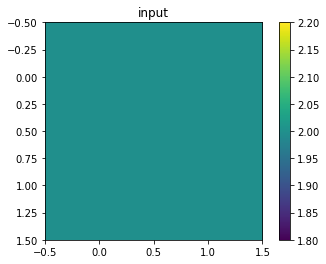

[[2. 2.]
 [2. 2.]]


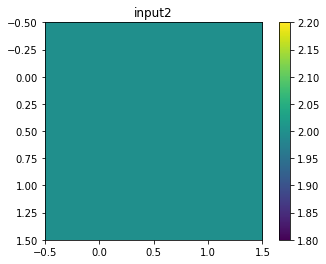

[[2. 2.]
 [2. 2.]]


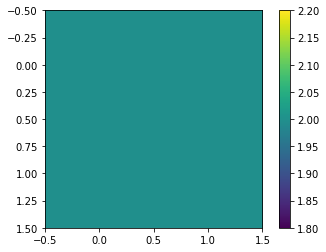

[[2. 2.]
 [2. 2.]]


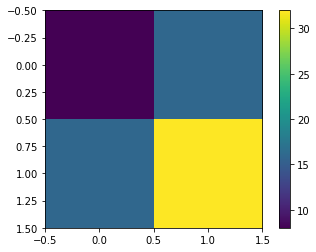

[[ 8. 16.]
 [16. 32.]]


In [42]:
#test math operation
@cuda.jit
def mathtest(A,B):
    x,y=cuda.grid(2)
    s=0
    for i in range(2):
        for j in range(2):
            s +=A[i,j]*(x+1)*(y+1)
    B[x,y]=s
            
    

random_array=np.ones((2,2))*2
plt.title('input')
plt.imshow(random_array)
plt.colorbar()
plt.show()
print(random_array)

random_array2=np.ones((2,2))*2
plt.title('input2')
plt.imshow(random_array)
plt.colorbar()
plt.show()
print(random_array)


size=2
TILE_DIM = 2
BLOCK_ROWS = 2
holder_cuda=cuda.to_device(random_array)
holder_cuda2=cuda.to_device(random_array2)

grid_shape = (int(size/TILE_DIM), int(size/TILE_DIM))
mathtest[grid_shape,(TILE_DIM, BLOCK_ROWS)](holder_cuda,holder_cuda2); cuda.synchronize()

output=holder_cuda.copy_to_host()
plt.imshow(output)
plt.colorbar()
plt.show()
print(output)

output2=holder_cuda2.copy_to_host()
plt.imshow(output2)
plt.colorbar()
plt.show()
print(output2)

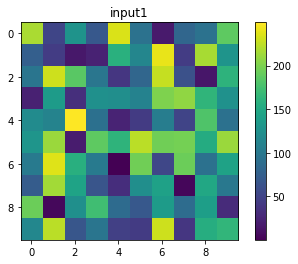

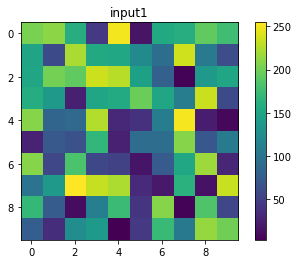

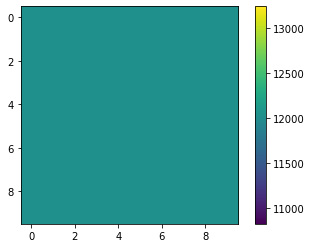

In [9]:
from numba import cuda
import numpy as np
import matplotlib.pyplot as plt

@cuda.jit
def convolve(result, mask, image):
    # expects a 2D grid and 2D blocks,
    # a mask with odd numbers of rows and columns, (-1-) 
    # a grayscale image
    
    # (-2-) 2D coordinates of the current thread:
    i, j = cuda.grid(2) 
    
    # (-3-) if the thread coordinates are outside of the image, we ignore the thread:
    image_rows, image_cols = image.shape
    if (i >= image_rows) or (j >= image_cols): 
        return
    
    # To compute the result at coordinates (i, j), we need to use delta_rows rows of the image 
    # before and after the i_th row, 
    # as well as delta_cols columns of the image before and after the j_th column:
    delta_rows = mask.shape[0] // 2 
    delta_cols = mask.shape[1] // 2
    
    # The result at coordinates (i, j) is equal to 
    # sum_{k, l} mask[k, l] * image[i - k + delta_rows, j - l + delta_cols]
    # with k and l going through the whole mask array:
    s = 0
    for k in range(mask.shape[0]):
        for l in range(mask.shape[1]):
            #i_k = i - k + delta_rows
            #j_l = j - l + delta_cols
            # (-4-) Check if (i_k, j_k) coordinates are inside the image: 
            #if (i_k >= 0) and (i_k < image_rows) and (j_l >= 0) and (j_l < image_cols):  
                #s += mask[k, l] * image[i_k, j_l]
            s +=  mask[k, l]
    result[i, j] = s
    
random_array=np.random.rand(10,10)*255
plt.title('input1')
plt.imshow(random_array)
plt.colorbar()
plt.show()
random_array1=np.random.rand(10,10)*255
plt.title('input1')
plt.imshow(random_array1)
plt.colorbar()
plt.show()


size=10
TILE_DIM = 2
BLOCK_ROWS = 2

number4_cuda=cuda.to_device(random_array)
number4_cuda1=cuda.to_device(random_array1)
holder=np.zeros_like(random_array)
holder_cuda=cuda.to_device(holder)


grid_shape = (int(size/TILE_DIM), int(size/TILE_DIM))

convolve[grid_shape,(TILE_DIM, BLOCK_ROWS)](holder_cuda,number4_cuda,number4_cuda); cuda.synchronize()

output=holder_cuda.copy_to_host()
plt.imshow(output)
plt.colorbar()
plt.show()